# Exam for Machine Learning Python Lab

Consider the file provided with the assignment and perform the tasks described below.
The solution must be produced as a Python Notebook, assuming that the dataset is in the same folder as the notebook. The notebook must include
appropriate comments and must operate as follows:

1. Upload the file Online-Retail-France.xlsx. It is a MS Excel file, you
can read it with the Pandas function read_excel, show the size and a\
small portion of its content . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .1pt

In [13]:
import warnings
warnings.filterwarnings('ignore') # uncomment this line to suppress warnings

import pandas as pd

df = pd.read_excel('Online-Retail-France.xlsx')

df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
0,536370,22728,ALARM CLOCK BAKELIKE PINK,24,2010-12-01 08:45:00,3.75,12583.0
1,536370,22727,ALARM CLOCK BAKELIKE RED,24,2010-12-01 08:45:00,3.75,12583.0
2,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,2010-12-01 08:45:00,3.75,12583.0
3,536370,21724,PANDA AND BUNNIES STICKER SHEET,12,2010-12-01 08:45:00,0.85,12583.0
4,536370,21883,STARS GIFT TAPE,24,2010-12-01 08:45:00,0.65,12583.0


In [14]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,8557.000000,8557.000000,8491.000000
mean,12.911067,5.028864,12677.995996
std,21.425031,79.909126,276.742088
min,-250.000000,0.000000,12413.000000
25%,5.000000,1.250000,12571.000000
50%,10.000000,1.790000,12674.000000
75%,12.000000,3.750000,12689.000000
max,912.000000,4161.060000,14277.000000


In [15]:
print(f"file has {df.shape[0]} rows and {df.shape[1]} columns (features)")

file has 8557 rows and 7 columns (features)


2. It is a transactional database where the role of transaction identifier
is played by the column InvoiceNo and the items are in the column\
Description. Print the number of unique Description values . . . 1pt

In [16]:
import numpy as np

print(f"there are {df['Description'].unique().shape[0]} unique descriptions")

print(df.nunique().sort_values(ascending=False)) # to print everything

there are 1565 unique descriptions
Description    1565
StockCode      1543
InvoiceNo       461
InvoiceDate     461
UnitPrice        97
CustomerID       87
Quantity         77
dtype: int64


3. Some descriptions represent the same item but have different leading or\
trailing spaces, therefore they must be made uniform with the Pandas\
function str.strip() Print the number of unique Description values\
after this cleaning . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 1pt

In [17]:
cleared = df[:]
cleared['Description'] = df['Description'].str.strip()

print(f"there are {np.unique(cleared['Description']).shape[0]} unique descriptions")

there are 1564 unique descriptions


4. Some rows may not have an InvoiceNo and must be removed, because\
they cannot be used. Check if there are such that rows and in case\
remove them. Inspect the effect of this cleaning. . . . . . . . . . . . . . . . . . 1pt

In [18]:
missing_count = cleared['InvoiceNo'].isna().sum()

print(f"missing InvoiceNo count {missing_count}")

if missing_count > 0:
    cleared.dropna(subset=['InvoiceNo'])

cleared.shape

missing InvoiceNo count 0


(8557, 7)

5. Some InvoiceNo start with a C. They are "credit transactions" and\
must be removed. Inspect the effect of this cleaning. . . . . . . . . . . . . . 1pt

In [19]:
count_with_C = cleared['InvoiceNo'].str.startswith('C').sum()

print(f"there are {count_with_C} credit transactions to be dropped..")

cleared = cleared[~cleared['InvoiceNo'].str.startswith('C')]

there are 149 credit transactions to be dropped..


6. Several transactions include the item POSTAGE, which represents the\
mailing expenses. In this analysis we are not interested in it, therefore the rows with POSTAGE will be removed. Inspect the effect of this\
cleaning. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 1pt

In [20]:
postage_count = len(cleared[cleared['Description'] == "POSTAGE"])

print(f"there are {postage_count} POSTAGE transtactions to be dropped..")

cleared = cleared[cleared['Description'] != "POSTAGE"]
cleared.head()

there are 300 POSTAGE transtactions to be dropped..


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
0,536370,22728,ALARM CLOCK BAKELIKE PINK,24,2010-12-01 08:45:00,3.75,12583.0
1,536370,22727,ALARM CLOCK BAKELIKE RED,24,2010-12-01 08:45:00,3.75,12583.0
2,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,2010-12-01 08:45:00,3.75,12583.0
3,536370,21724,PANDA AND BUNNIES STICKER SHEET,12,2010-12-01 08:45:00,0.85,12583.0
4,536370,21883,STARS GIFT TAPE,24,2010-12-01 08:45:00,0.65,12583.0


7. After the cleanup, we need to consolidate the items into one transaction per row with products one–hot–encoded. To do so, group by\
InvoiceNo and Description computing a sum on Quantity, use the\
Pandas unstack function to move the items from rows to columns, reset\
the index, fill the missing with zero, store the result in a new dataframe\
basket and inspect it. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 2pt

In [21]:
grouped = cleared[:].groupby(by=['InvoiceNo', 'Description'])['Quantity'].sum()

basket = grouped.unstack(fill_value=0, sort=True)
basket.reset_index()

basket.sample(20)

Description,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 EGG HOUSE PAINTED WOOD,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE WOODLAND,...,WRAP VINTAGE PETALS DESIGN,YELLOW COAT RACK PARIS FASHION,YELLOW GIANT GARDEN THERMOMETER,YELLOW SHARK HELICOPTER,ZINC STAR T-LIGHT HOLDER,ZINC FOLKART SLEIGH BELLS,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
540789,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
546479,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
574068,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
572986,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
557489,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
555937,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
554648,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
540688,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
559889,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


8. There are a lot of zeros in the data but we also need to convert to True\
the positive values and to False the non–positive values. Inspect the\
result of this transformation and verify the correctness. . . . . . . . . . . 1pt

In [22]:
basket = basket > 0

basket.sample(20)

Description,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 EGG HOUSE PAINTED WOOD,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE WOODLAND,...,WRAP VINTAGE PETALS DESIGN,YELLOW COAT RACK PARIS FASHION,YELLOW GIANT GARDEN THERMOMETER,YELLOW SHARK HELICOPTER,ZINC STAR T-LIGHT HOLDER,ZINC FOLKART SLEIGH BELLS,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
567915,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
569122,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
580120,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
539727,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
574104,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
580126,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
575326,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
573428,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
565930,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False


9. find the maximum value of min_support such that the number of rules\
generated from the frequent itemsets with **lift not less than 1 is at least\
20**\. Show the value obtained for min_support and show the rules.\
**Hint**: use a loop with an initial value min_support=1 and decrease it in\
steps -0.01\
**Hint**: In apriori set the parameter use_colnames=True. . . . . . . . . 2pt

10. Generate the rules with association_rules using metric=lift and\
min_threshold=1. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 4pt

In [25]:
from mlxtend.frequent_patterns import apriori, association_rules

min_support = 1.0  # Start with the highest value
step = -0.01       # Decrease by 0.01 in each iteration
target_rules = 20  # At least 20 rules with lift >= 1

best_min_support = None
best_f_itemsets = None
best_rules = None

# Loop to find the maximum min_support
while min_support > 0:
    # Generate frequent itemsets
    frequent_itemsets = apriori(basket, min_support=min_support, use_colnames=True)

    # Check if frequent_itemsets is not empty
    if frequent_itemsets.empty:
        min_support += step
        continue  # Skip the current iteration if no itemsets found
    
    # Generate association rules with lift >= 1
    rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1, num_itemsets=len(frequent_itemsets))
    
    # Check if the number of rules with lift >= 1 is at least 20
    if len(rules) >= target_rules:
        best_min_support = min_support
        best_rules = rules
        best_f_itemsets = frequent_itemsets
        break  # Stop when condition is satisfied
    
    # Decrease min_support
    min_support += step

if best_min_support is not None:
    print(f"Best min_support: {best_min_support}")
    print(f"Number of rules: {len(best_rules)}")
    print(f"Number of frequent itemsets: {len(best_f_itemsets)}")
    print(f"Number of rules: {len(best_rules)}")
    print("Rules:")
    best_rules = pd.DataFrame(best_rules, columns=['antecedents', 'consequents', 'support', 'confidence', 'lift'])
else:
    print("No suitable min_support found.")

Best min_support: 0.07999999999999925
Number of rules: 20
Number of frequent itemsets: 41
Number of rules: 20
Rules:


In [26]:
best_rules

,antecedents,consequents,support,confidence,lift
0,(ALARM CLOCK BAKELIKE RED),(ALARM CLOCK BAKELIKE GREEN),0.080103,0.837838,8.532717
1,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED),0.080103,0.815789,8.532717
2,(PLASTERS IN TIN CIRCUS PARADE),(PLASTERS IN TIN SPACEBOY),0.090439,0.530303,3.800505
3,(PLASTERS IN TIN SPACEBOY),(PLASTERS IN TIN CIRCUS PARADE),0.090439,0.648148,3.800505
4,(PLASTERS IN TIN WOODLAND ANIMALS),(PLASTERS IN TIN CIRCUS PARADE),0.103359,0.597015,3.500678
5,(PLASTERS IN TIN CIRCUS PARADE),(PLASTERS IN TIN WOODLAND ANIMALS),0.103359,0.606061,3.500678
6,(PLASTERS IN TIN WOODLAND ANIMALS),(PLASTERS IN TIN SPACEBOY),0.105943,0.611940,4.385572
7,(PLASTERS IN TIN SPACEBOY),(PLASTERS IN TIN WOODLAND ANIMALS),0.105943,0.759259,4.385572
8,(SET/6 RED SPOTTY PAPER CUPS),(SET/20 RED RETROSPOT PAPER NAPKINS),0.103359,0.740741,5.512821
9,(SET/20 RED RETROSPOT PAPER NAPKINS),(SET/6 RED SPOTTY PAPER CUPS),0.103359,0.769231,5.512821


11. In order to scatter–plot some information about the rules, it is better\
to sort them according to some metrics.\
We will sort on descending lift and confidence, then do a scatter plot\
of them. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 1pt

                                         antecedents  \
0                         (ALARM CLOCK BAKELIKE RED)   
1                       (ALARM CLOCK BAKELIKE GREEN)   
2  (SET/6 RED SPOTTY PAPER CUPS, SET/20 RED RETRO...   
3                    (SET/6 RED SPOTTY PAPER PLATES)   
4  (SET/6 RED SPOTTY PAPER PLATES, SET/20 RED RET...   

                                         consequents   support  confidence  \
0                       (ALARM CLOCK BAKELIKE GREEN)  0.080103    0.837838   
1                         (ALARM CLOCK BAKELIKE RED)  0.080103    0.815789   
2                    (SET/6 RED SPOTTY PAPER PLATES)  0.100775    0.975000   
3  (SET/6 RED SPOTTY PAPER CUPS, SET/20 RED RETRO...  0.100775    0.780000   
4                      (SET/6 RED SPOTTY PAPER CUPS)  0.100775    0.975000   

       lift  
0  8.532717  
1  8.532717  
2  7.546500  
3  7.546500  
4  6.987500  


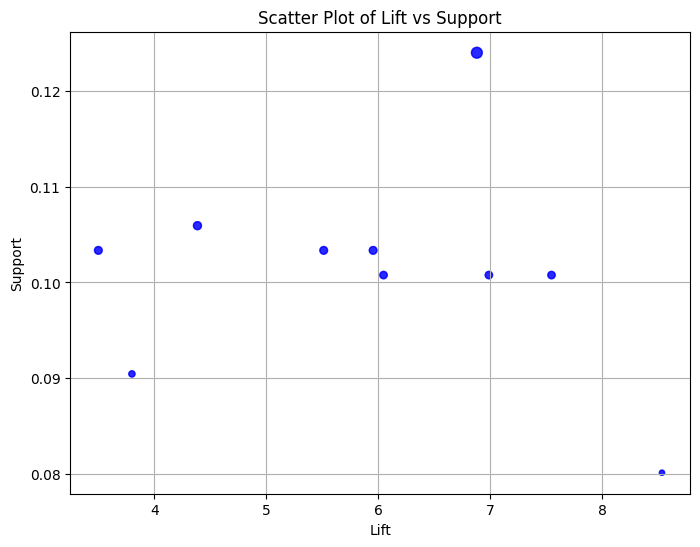

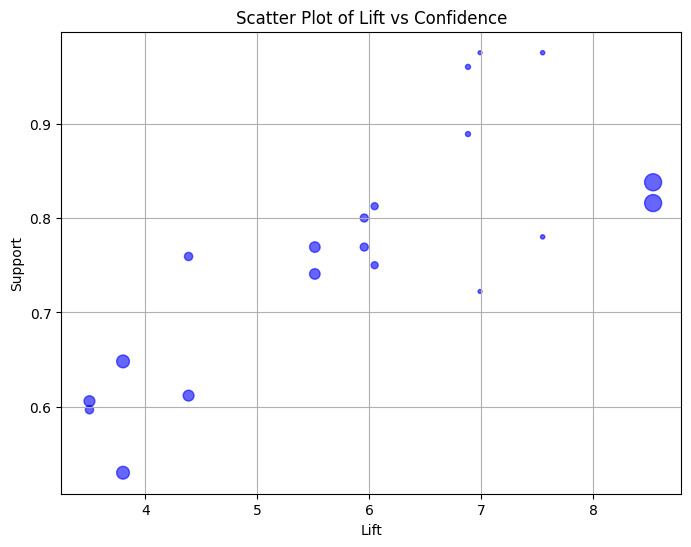

In [24]:
import matplotlib.pyplot as plt

# Ensure the DataFrame is sorted by 'lift' and 'confidence' in descending order
sorted_rules = best_rules.sort_values(by=['lift', 'confidence'], ascending=False).reset_index(drop=True)

print(sorted_rules.head())

s=3**(sorted_rules['support']*30)
# Scatter plot: lift vs support
plt.figure(figsize=(8, 6))
plt.scatter(sorted_rules['lift'], sorted_rules['support'], alpha=0.6, c='blue', s=s)
plt.xlabel('Lift')
plt.ylabel('Support')
plt.title('Scatter Plot of Lift vs Support')
plt.grid(True)
plt.show()

s = [1.8**n for n in rules.lift]
plt.figure(figsize=(8, 6))
plt.scatter(sorted_rules['lift'], sorted_rules['confidence'], alpha=0.6, c='blue', s=s)
plt.xlabel('Lift')
plt.ylabel('Support')
plt.title('Scatter Plot of Lift vs Confidence')
plt.grid(True)
plt.show()